<a href="https://colab.research.google.com/github/kanishkbjain/TEI_HockeyPrediction/blob/main/notebooks/NN_log_rf_ada_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sorry, I did this in Colab for the GPU speedup while training, but it means the files aren't in the right place for you guys

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#allows drawing digrams in jupyeter notebooks
%matplotlib inline
#loading tensorboard
%load_ext tensorboard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#specific tensorflow libraries
import tensorflow as tf
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import datetime

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
def Train_Test_XY_normalize_PCA(TrainX, TrainY, TestX, PCA_n = None):
    
    # normalize data
    scaler_new = StandardScaler()
    scaler_new.fit(TrainX)
    X_train_scale = scaler_new.transform(TrainX)
    X_test_scale = scaler_new.transform(TestX)

    print(f'X shape {X_train_scale.shape}')
    
    if PCA_n != None:
        # dimension reduction
        TrainX_PCA = Train_Test_XY_PCA(X_train_scale, PCA_n = PCA_n)
        print(f'X shape {TrainX_PCA.shape}')
    
        # normalize again
        scaler_new = StandardScaler()
        scaler_new.fit(TrainX_PCA)
        X_train_scale = scaler_new.transform(TrainX_PCA)
        
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_scale,TrainY,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=2020,
                                                       stratify=TrainY)
    
    
    return X_train, X_val, y_train, y_val, X_test_scale

In [ ]:
import tensorflow.keras.backend as Kb

# Write a custom loss function
def custom_loss(y_true, y_pred):
    binary_crossentropy = Kb.mean(Kb.binary_crossentropy(y_true, y_pred), axis = -1)
    prob_constraint = Kb.square(Kb.sum(y_pred, axis = -1)
                                - Kb.sum(y_true, axis = -1))

    return(binary_crossentropy+prob_constraint)

In [ ]:
def NN_TF_model(structure, ipt_dim, learning_rate=0.01):
    model=Sequential()

    model.add(layers.Dense(structure[0], input_shape=(ipt_dim,), activation='relu'))
    
    for i in range(len(structure)-1):
        model.add(layers.Dense(structure[i+1], activation='relu'))
        
    model.add(layers.Dense(1, activation='sigmoid'))

    # opt = optimizers.SGD(learning_rate=0.01)
    # opt = optimizers.Adam(learning_rate=0.1)
    opt = optimizers.Nadam(learning_rate=0.01)

    # model.compile(loss='mean_squared_error', optimizer=opt)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    # model.compile(loss=custom_loss, optimizer=opt)
    # model.compile(loss='huber', optimizer=opt)
    # model.compile(loss='binary_focal_crossentropy', optimizer=opt)
    print(model.summary())
    
    return model

# simple NN model

In [ ]:
# import seaborn as sns
# sns.pairplot(data=tm_players,
#              y_vars = ['Winner'],
#              x_vars = see_column2)



In [ ]:
# see_column = np.array(['Rk', 'AvAge', 'GP', 'W', 'L', 'OL', 'PTS', 'PTS%',
#        'GF', 'GA', 'SOW', 'SOL', 'SRS', 'SOS', 'GF/G', 'GA/G', 'PP', 'PPO',
#        'PP%', 'PPA', 'PPOA', 'PK%', 'SH', 'SHA', 'PIM/G', 'oPIM/G', 'S', 'S%',
#        'SA', 'SV%', 'SO', 'Hits', 'Hits/60', 'BkS', 'BkS/60', 'GvA', 'GvA/60',
#        'TkA', 'TkA/60', 'ENG', 'MsS', '5v5 TOI/GP', 'SAT%', 'Playoffs%',
#        'Playoffs', 'WonCup', 'TA/GA'])

see_column = np.array(['PTS', 'W','L', 'GF', 'GA', 'SRS', 
                                  'SOS', 'PK%', 'S%', 'SV%', 'SAT%', 
                                  'MsS', 'TA/GA'])
# see_column = np.array(['W', 'L', 'GA', 'SAT%', 'TA/GA'])

see_column2 = np.array(['Winner',
                       'F_home_assists', 'F_home_goals', 'F_home_pim', 'F_home_shots',
                       'F_home_blocked', 'F_home_pm', 'D_home_assists', 'D_home_goals',
                       'D_home_pim', 'D_home_shots', 'D_home_blocked', 'D_home_hits',
                       'D_home_pm', 'G_home_GAA', 'F_away_assists', 'F_away_goals',
                       'F_away_pim', 'F_away_shots', 'F_away_blocked', 'F_away_hits',
                       'F_away_pm', 'D_away_assists', 'D_away_goals', 'D_away_pim',
                       'D_away_shots', 'D_away_blocked', 'D_away_hits', 'D_away_pm',
                       'G_away_GAA', 'F_home_hits'])


column_home = np.array([i+'_H' for i in see_column])
column_away = np.array([i+'_A' for i in see_column])

column_name = np.concatenate((column_home,column_away))

column_name = np.concatenate((see_column2,column_name))
#  column_name = np.concatenate((column_name,['class'])) # Winner is the class

# ## only consider tm data
# column_home = np.array([i+'_H' for i in see_column])
# column_away = np.array([i+'_A' for i in see_column])
# column_name = np.concatenate((column_home,column_away))
# column_name = np.concatenate((['Winner'],column_name)) # Winner is the class

## only consider players data
column_name = see_column2

print(column_name)
print(len(column_name))

['Winner' 'F_home_assists' 'F_home_goals' 'F_home_pim' 'F_home_shots'
 'F_home_blocked' 'F_home_pm' 'D_home_assists' 'D_home_goals' 'D_home_pim'
 'D_home_shots' 'D_home_blocked' 'D_home_hits' 'D_home_pm' 'G_home_GAA'
 'F_away_assists' 'F_away_goals' 'F_away_pim' 'F_away_shots'
 'F_away_blocked' 'F_away_hits' 'F_away_pm' 'D_away_assists'
 'D_away_goals' 'D_away_pim' 'D_away_shots' 'D_away_blocked' 'D_away_hits'
 'D_away_pm' 'G_away_GAA' 'F_home_hits']
31


#### Train NN model

In [ ]:
#You have to change these inputs back to what Chenyi had
tm_players = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Erdos Institute Boot Camp/Erdos Institute Final Project - SKYLAB/Data/tm_player_stats_2005_2021.csv')
playoff = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Erdos Institute Boot Camp/Erdos Institute Final Project - SKYLAB/Data/playoff_stats_2005_2021.csv')
playoff_test = playoff[:-87]
playoff_pred = playoff[1436:1509]

tm_players[column_name].sample(1)

,Winner,F_home_assists,F_home_goals,F_home_pim,F_home_shots,F_home_blocked,F_home_pm,D_home_assists,D_home_goals,D_home_pim,...,F_away_pm,D_away_assists,D_away_goals,D_away_pim,D_away_shots,D_away_blocked,D_away_hits,D_away_pm,G_away_GAA,F_home_hits
17630,0,1.242227,0.785822,4.119821,7.797086,1.461922,-0.343104,0.768057,0.263551,1.718928,...,0.31894,0.836758,0.109884,3.048258,3.409468,5.424846,4.507988,0.228585,2.580799,4.544049


In [ ]:
playoff_pred.head(40)

,homeTeam,awayTeam,homeAbbrev,awayAbbrev,GamePK,year,Winner,F_home_assists,F_home_goals,F_home_pim,...,TkA_A,TkA/60_A,ENG_A,MsS_A,5v5 TOI/GP_A,SAT%_A,Playoffs%_A,Playoffs_A,WonCup_A,TA/GA_A
1436,Minnesota Wild,St. Louis Blues,MIN,STL,2021030161,2021,1.0,1.454759,0.871291,3.463298,...,612,7.39,21,10.134146,48.700000,47.1,-1.0,f,-1,0.967277
1437,Edmonton Oilers,Los Angeles Kings,EDM,LAK,2021030181,2021,1.0,1.348989,0.980461,1.965073,...,447,5.37,19,12.975610,48.733333,54.2,-1.0,f,-1,0.797920
1438,New York Rangers,Pittsburgh Penguins,NYR,PIT,2021030141,2021,1.0,1.059499,0.769645,1.540431,...,647,7.77,22,11.707317,49.266667,52.1,-1.0,f,-1,1.010403
1439,Florida Panthers,Washington Capitals,FLA,WSH,2021030111,2021,1.0,1.644462,1.140087,2.132880,...,551,6.62,21,12.317073,48.633333,50.5,-1.0,f,-1,0.909341
1440,Colorado Avalanche,Nashville Predators,COL,NSH,2021030151,2021,0.0,1.487711,1.048456,1.894030,...,534,6.44,17,12.402439,47.100000,49.7,-1.0,f,-1,0.730988
1441,Calgary Flames,Dallas Stars,CGY,DAL,2021030171,2021,0.0,1.270271,1.002407,1.804618,...,459,5.52,13,12.146341,48.950000,49.0,-1.0,f,-1,0.578010
1442,Carolina Hurricanes,Boston Bruins,CAR,BOS,2021030132,2021,0.0,1.297849,0.945376,1.815331,...,528,6.39,11,11.378049,48.000000,54.4,-1.0,f,-1,0.815051
1443,Toronto Maple Leafs,Tampa Bay Lightning,TOR,TBL,2021030122,2021,1.0,1.316698,0.998464,1.796410,...,549,6.60,11,12.524390,47.816667,50.9,-1.0,f,-1,1.217712
1444,Minnesota Wild,St. Louis Blues,MIN,STL,2021030162,2021,0.0,1.454759,0.871291,3.463298,...,612,7.39,21,10.134146,48.700000,47.1,-1.0,f,-1,0.967277
1445,Edmonton Oilers,Los Angeles Kings,EDM,LAK,2021030182,2021,0.0,1.348989,0.980461,1.965073,...,447,5.37,19,12.975610,48.733333,54.2,-1.0,f,-1,0.797920


In [ ]:
# Traindf_diff = pd.DataFrame(data = Traindf[column_home].to_numpy() 
#                                     - Traindf[column_away].to_numpy(), 
#                             columns = see_column)

Traindf = tm_players[column_name]
TrainX_array = Traindf[column_name[1:]].to_numpy()
TrainY_array = Traindf[column_name[0]].to_numpy()

Testdf = playoff_test[column_name]
TestX_array = Testdf[column_name[1:]].to_numpy()
TestY_array = Testdf[column_name[0]].to_numpy()
y_test = TestY_array

Preddf = playoff_pred[column_name]
PredX_array = Preddf[column_name[1:]].to_numpy()
y_pred = Preddf[column_name[0]].to_numpy()
print(sum(TrainY_array)/len(TrainY_array))

0.45341645885286785


In [ ]:
X_train, X_val, y_train, y_val, X_test = Train_Test_XY_normalize_PCA(TrainX_array, 
                                                                    TrainY_array, 
                                                                   # TestX_array)                                                                     
                                                                    PredX_array)

X shape (20050, 30)


In [ ]:
#creating unique name for tensorboard directory
log_dir = "logs/NN/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#Tensforboard callback function
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

struct = [20,10,30]
dim = X_train.shape[1]
model = NN_TF_model(structure = struct, ipt_dim = dim)
history = model.fit(X_train,
                  y_train,
                  validation_split = 0.2,
                  epochs=300,
                  batch_size=100,
                  shuffle=True,
                  callbacks=[tensorboard_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 30)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
129/129 [==============================] - 2s 7ms/step - loss: 0.6589 - accuracy: 0.6077 - val_loss: 0.6606 - val_accuracy: 0.6029
Epoch 2/300
129/129 [=================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


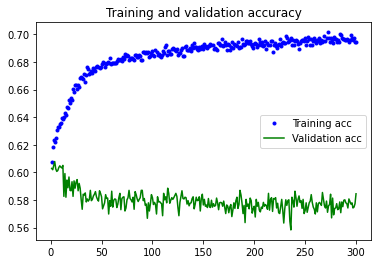

In [ ]:
model.test_on_batch(X_val, y_val)
model.metrics_names
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b.', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'b.', label='Training loss')
# plt.plot(epochs, val_loss, 'g', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

plt.show()

In [ ]:
m = metrics.Accuracy()
mc = metrics.CategoricalAccuracy()

In [ ]:
y_hat=model.predict(X_train)>0.5
y_hat=np.squeeze(y_hat)*1

In [ ]:
m.update_state(y_train, y_hat)
mc.update_state(y_train, y_hat)
print('away win rate = ', sum(y_hat)/len(y_hat))
print('Train data accuracy',m.result().numpy())
# print('Train data categorical accuracy',mc.result().numpy())
tf.math.confusion_matrix(y_train, y_hat)

away win rate =  0.44152119700748127
Train data accuracy 0.67662096
Train data categorical accuracy 1.0


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6269, 2498],
       [2689, 4584]], dtype=int32)>

In [ ]:
y_hat=model.predict(X_val)>0.5
y_hat=np.squeeze(y_hat)*1

In [ ]:
m.update_state(y_val, y_hat)
print('away win rate = ',sum(y_hat)/len(y_hat))
print('Test data accuracy',m.result().numpy())
tf.math.confusion_matrix(y_val, y_hat)

away win rate =  0.45236907730673315
Test data accuracy 0.6227182


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1380,  812],
       [ 816, 1002]], dtype=int32)>

In [ ]:
y_hat=model.predict(X_test)>0.5
y_hat=np.squeeze(y_hat)*1

In [ ]:
m.update_state(y_pred, y_hat)
print('away win rate = ',sum(y_hat)/len(y_hat))
print('Test data accuracy',m.result().numpy())
tf.math.confusion_matrix(y_pred, y_hat)

away win rate =  0.3698630136986301
Test data accuracy 0.6225724


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[29, 15],
       [17, 12]], dtype=int32)>

In [ ]:
SeriesProb(model.predict(X_test))

array([[9.9894917e-01],
       [5.9447002e-01],
       [9.4854546e-01],
       [4.2167252e-05],
       [1.7175695e-02],
       [4.1994154e-01],
       [6.3072574e-01],
       [4.1994154e-01],
       [9.9894917e-01],
       [6.2536323e-01],
       [9.3974203e-01],
       [1.7373342e-04],
       [7.9707131e-03],
       [4.1994154e-01],
       [9.3617868e-03],
       [3.4895790e-01],
       [6.7873949e-01],
       [8.0245024e-01],
       [9.9999785e-01],
       [9.5469266e-01],
       [8.2772434e-02],
       [7.8122014e-01],
       [2.9925942e-01],
       [6.3072574e-01],
       [1.3234991e-02],
       [7.8863025e-01],
       [9.6140629e-01],
       [9.1477670e-02],
       [9.5469266e-01],
       [7.8122014e-01],
       [4.1994154e-01],
       [1.7954966e-01],
       [4.1096967e-01],
       [6.2536323e-01],
       [4.1994154e-01],
       [1.4603646e-03],
       [4.1994154e-01],
       [2.9925942e-01],
       [1.3406727e-02],
       [6.3072574e-01],
       [7.8863025e-01],
       [9.843349

In [ ]:
def SeriesProb(model_prediction):
    win = model_prediction
    lose = 1-model_prediction
    return win**4 * 1 + win**4 * lose**1 * 4 + win**4 * lose**2 * 10 + win**4 *  lose**3 * 20

#New Model: Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(random_state=4, penalty = 'none').fit(X_train, y_train)
np.hstack((log.predict(X_test), np.round(model.predict(X_test))))

ValueError: ignored

In [ ]:
np.round(model.predict(X_test))

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
np.hstack((log.predict_proba(X_test),model.predict(X_test)))

array([[4.63225183e-01, 5.36774817e-01, 9.22338724e-01],
       [6.02848696e-01, 3.97151304e-01, 5.43514371e-01],
       [2.45129122e-01, 7.54870878e-01, 7.72742510e-01],
       [4.49625067e-01, 5.50374933e-01, 3.38181555e-02],
       [7.94849426e-01, 2.05150574e-01, 1.65437683e-01],
       [7.32938436e-01, 2.67061564e-01, 4.63203192e-01],
       [5.18044685e-01, 4.81955315e-01, 5.60644627e-01],
       [3.62073490e-01, 6.37926510e-01, 4.63203192e-01],
       [4.63225183e-01, 5.36774817e-01, 9.22338724e-01],
       [6.24479953e-01, 3.75520047e-01, 5.58086514e-01],
       [2.54169611e-01, 7.45830389e-01, 7.61704385e-01],
       [4.99575678e-01, 5.00424322e-01, 4.86244783e-02],
       [7.78375702e-01, 2.21624298e-01, 1.33658290e-01],
       [7.32938436e-01, 2.67061564e-01, 4.63203192e-01],
       [6.45199119e-01, 3.54800881e-01, 1.39704242e-01],
       [7.18273867e-01, 2.81726133e-01, 4.29571390e-01],
       [6.13120809e-01, 3.86879191e-01, 5.84044039e-01],
       [4.66173098e-01, 5.33826

In [ ]:
log.score(X_train, y_train)

0.6189526184538653

In [ ]:
log.score(X_val, y_val)

0.6281795511221945

In [ ]:
log.score(X_test, y_pred)

0.6164383561643836

New Model: Boosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2, random_state = 43210),
                             n_estimators = 10, #The more estimators we use, the higher the training accuracy and lower the testing accuracy.
                             learning_rate = 1,
                             random_state = 2906)

In [ ]:
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=43210),
                   learning_rate=1, n_estimators=10, random_state=2906)

In [ ]:
ada.score(X_train, y_train)

0.6227556109725686

In [ ]:
ada.score(X_val, y_val)

0.6209476309226932

In [ ]:
ada.score(X_test, y_pred)

0.5616438356164384

In [ ]:
ada.predict_proba(X_test)

array([[0.49486675, 0.50513325],
       [0.49999181, 0.50000819],
       [0.48785547, 0.51214453],
       [0.52535708, 0.47464292],
       [0.50902187, 0.49097813],
       [0.50359073, 0.49640927],
       [0.49940809, 0.50059191],
       [0.49134323, 0.50865677],
       [0.49486675, 0.50513325],
       [0.50199019, 0.49800981],
       [0.48785547, 0.51214453],
       [0.52386345, 0.47613655],
       [0.50902187, 0.49097813],
       [0.50359073, 0.49640927],
       [0.49444047, 0.50555953],
       [0.50804124, 0.49195876],
       [0.49706987, 0.50293013],
       [0.50034619, 0.49965381],
       [0.4994662 , 0.5005338 ],
       [0.49286156, 0.50713844],
       [0.51626749, 0.48373251],
       [0.4903986 , 0.5096014 ],
       [0.49100767, 0.50899233],
       [0.49371586, 0.50628414],
       [0.50686866, 0.49313134],
       [0.50034619, 0.49965381],
       [0.4994662 , 0.5005338 ],
       [0.50503836, 0.49496164],
       [0.49286156, 0.50713844],
       [0.4903986 , 0.5096014 ],
       [0.

In [ ]:
rf = RandomForestClassifier(n_estimators = 500,
                                max_depth = 4)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500)

In [ ]:
rf.score(X_train, y_train)

0.6215087281795512

In [ ]:
rf.score(X_val, y_val)

0.6154613466334165

In [ ]:
rf.score(X_test, y_pred)

0.5205479452054794

Not enough time to figure out how to make a neural net work, lol

In [ ]:
vote = VotingClassifier([('rf', RandomForestClassifier(n_estimators = 500,
                                max_depth = 5,
                                max_samples = 200)),
                         ('log', LogisticRegression(penalty = 0)),
                         ('nn', NN_TF_model(structure = struct, ipt_dim = dim)),
                         ('ada', AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2, random_state = 43210),
                             n_estimators = 30,
                             learning_rate = 1,
                             random_state = 2906))], voting = 'soft')  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 30)                330       
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________
None


ValueError: ignored

In [ ]:
pred

array([0., 0., 0., 0.])

In [ ]:
round1 = [4, 0, 5, 1, 3, 7, 6, 2]
pred1 = np.zeros((4,8))

In [ ]:
pred1[0] = np.reshape(model.predict(X_test)[round1], -1)
pred1[1] = log.predict_proba(X_test)[round1,1]
pred1[2] = ada.predict_proba(X_test)[round1,1]
pred1[3] = rf.predict_proba(X_test)[round1,1]

In [ ]:
SeriesProb(np.mean(pred1, axis = 0))

array([0.10846269, 0.71127369, 0.25407971, 0.4283623 , 0.21841286,
       0.56227455, 0.4829345 , 0.8044829 ])

In [ ]:
np.ones(8) - SeriesProb(np.mean(pred1, axis = 0)) #Probability of home team winning

array([0.89153731, 0.28872631, 0.74592029, 0.5716377 , 0.78158714,
       0.43772545, 0.5170655 , 0.1955171 ])


What is the probability of winning a 2nd round game?

Avalance have an 89% chance of making it to teh 2nd round.

There, they have two possibilities: minnesota or st louis.
The most probable options is they face st. louis and we calculate that probability.

((col vs min) * prob min + (col vs blues) * prob blues) * prob avalance

((min vs ave) * prob ave + (min vs wild) * prob wild) * prob min

(wild * min) * prob min + (wild vs blues) * prob blues    * prob wild

(blues * ave) * prob ave + (blues x wild) * prob wild    * prob blues

_______________

for semis, we have avalance vs 4 possible teams

so ave x cal * cal + ave x dal * dal + ave * oil x oil + ave * la * la
all times ave


put simply: prob(team 1 vs team 2)* prob(team 1) * prob(team 2)

In [ ]:
round2 = [52, 54, 51, -1]
pred2 = np.zeros(4,4)

I'd love if someone could find the last game we know all the data for each team, and make it a dataframe so that we can feed it into each of the models.

So like, give me a 1x15 for COL, a 1x15 for MIN, a 1x15 for everyone, so we can calculate the probabilities of all the potential permutations that the bracket allows

In [ ]:
hm = playoff_pred[column_name[1:15]][53] #Does this work? Needs to draw the appropriate line from the dataset, but just the first 15 columns
aw = playoff_pred[column_name[1:15]][49]
newrow = pd.concat((hm, aw), axis = 1)
playoff_pred.append(newrow)

In [ ]:
Preddf = playoff_pred[column_name]
PredX_array = Preddf[column_name[1:]].to_numpy()

In [ ]:
X_train, X_val, y_train, y_val, X_test = Train_Test_XY_normalize_PCA(TrainX_array, 
                                                                    TrainY_array, 
                                                                   # TestX_array)                                                                     
                                                                    PredX_array)

In [ ]:
pred1[0] = np.reshape(model.predict(X_test)[round1], -1)
pred1[1] = log.predict_proba(X_test)[round1,1]
pred1[2] = ada.predict_proba(X_test)[round1,1]
pred1[3] = rf.predict_proba(X_test)[round1,1]

In [ ]:
SeriesProb(np.mean(pred2, axis = 0))

In [ ]:
np.ones(4) - SeriesProb(np.mean(pred2, axis = 0)) #Probability of home team winning